Data vektor:
Data ke-1:
[0.83719802 0.84896272 0.88425684 ... 0.69332659 0.6593906  0.62539648]

Data ke-2:
[0.32238114 0.20867173 0.08121425 ... 0.00393019 0.00393019 0.00393019]

Data ke-3:
[0.09907594 0.09907594 0.09907594 ... 0.         0.         0.        ]

Data ke-4:
[0.04884636 0.06061106 0.03316008 ... 0.0895469  0.12628396 0.05007745]

Data ke-5:
[0.38668255 0.35169585 0.18860263 ... 0.62205066 0.48087419 0.38675654]

Data ke-6:
[0.3758012  0.37579953 0.4096563  ... 0.33890923 0.22493092 0.00661663]

Data ke-7:
[0.29768341 0.31894085 0.15175668 ... 0.16598222 0.1916995  0.11504977]

Data ke-8:
[0.05093071 0.04955215 0.06115974 ... 0.05363453 0.05363453 0.06147767]

Data ke-9:
[0.47873643 0.48149111 0.50197789 ... 0.07168625 0.17072231 0.07723846]

Data ke-10:
[0.03872047 0.0432294  0.05087139 ... 0.00114982 0.00507138 0.02467923]

Data ke-11:
[0.5796682  0.74437408 0.1796682  ... 0.32906099 0.36263858 0.11297191]

Data ke-12:
[0. 0. 0. ... 0. 0. 0.]

Data ke-13:
[0.61270232 

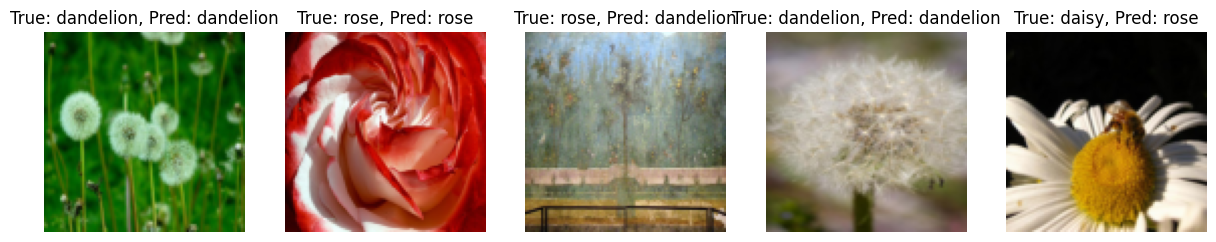

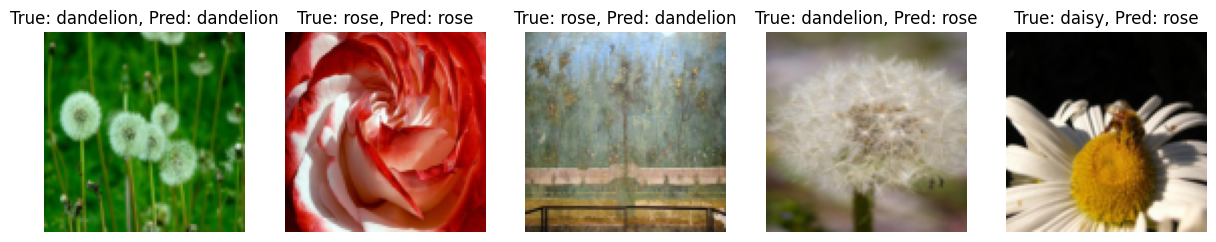

In [1]:
# Import Library
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.transform import resize
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Fungsi untuk memuat dataset gambar
def load_images(folder_path):
    images = []
    labels = []
    for label in os.listdir(folder_path):
        label_path = os.path.join(folder_path, label)
        for filename in os.listdir(label_path):
            img_path = os.path.join(label_path, filename)
            image = imread(img_path)
            image_resized = resize(image, (100, 100))  # Mengubah ukuran gambar menjadi 100x100 piksel
            images.append(image_resized.flatten())  # Flattening gambar menjadi vektor fitur
            labels.append(label)
    return np.array(images), np.array(labels)

# Fungsi untuk menampilkan beberapa contoh gambar beserta prediksinya
def plot_predicted_images(images, labels_true, labels_pred, n_samples=5):
    fig, axes = plt.subplots(1, n_samples, figsize=(15, 5))
    for i, ax in enumerate(axes):
        ax.imshow(images[i].reshape(100, 100, 3))  # Mengubah vektor fitur kembali ke bentuk gambar
        ax.set_title(f'True: {labels_true[i]}, Pred: {labels_pred[i]}')
        ax.axis('off')
    plt.show()

# Memuat dataset gambar
folder_path = "D:\ml1\dataset"
X, y = load_images(folder_path)

# Tampilkan data dalam bentuk data vektor
print("Data vektor:")
for i, x in enumerate(X):
    print(f"Data ke-{i+1}:")
    print(x)
    print()

# Pembagian data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Preprocessing: Penskalaan fitur menggunakan StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Inisialisasi dan pelatihan model SVM
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train_scaled, y_train)

# Prediksi menggunakan data uji
y_pred = svm_classifier.predict(X_test_scaled)

# Mengukur akurasi
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi model SVM:", accuracy)

# Inisialisasi dan pelatihan model KNN
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train_scaled, y_train)

# Prediksi menggunakan data uji
y_pred_knn = knn_classifier.predict(X_test_scaled)

# Mengukur akurasi
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("Akurasi model KNN:", accuracy_knn)

# Memvisualisasikan beberapa contoh gambar dan prediksinya (SVM)
n_samples_to_visualize = 5
plot_predicted_images(X_test, y_test, y_pred, n_samples=n_samples_to_visualize)

# Memvisualisasikan beberapa contoh gambar dan prediksinya (KNN)
plot_predicted_images(X_test, y_test, y_pred_knn, n_samples=n_samples_to_visualize)
